In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

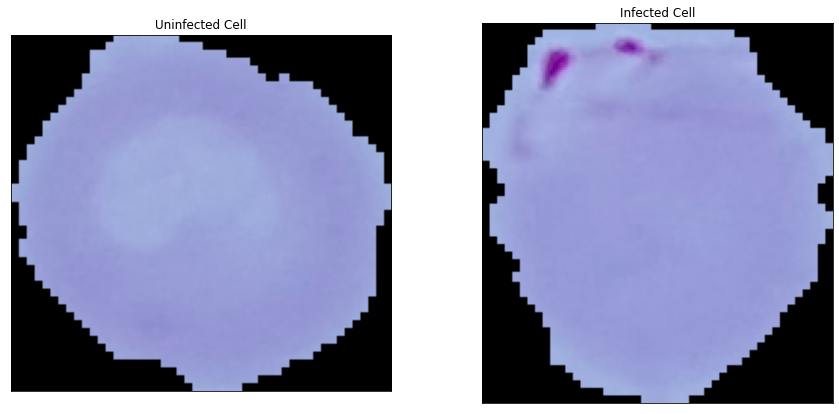

In [ ]:
import cv2

upic='D:/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
apic='D:/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'

plt.figure(1, figsize = (15 , 7))

plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
width = 128
height = 128

# Dividing Dataset into two folders train and test

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Preparing train and test Image Generator

In [ ]:
trainDatagen = datagen.flow_from_directory(directory='D:/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

valDatagen = datagen.flow_from_directory(directory='D:/cell_images/cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


# Preparing the model

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

# epochs

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
history = model.fit_generator(generator = trainDatagen,
                              steps_per_epoch = len(trainDatagen),
                              epochs =20,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                              callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1378/1378 [==============================] - 156s 113ms/step - loss: 0.4698 - accuracy: 0.7591 - val_loss: 0.1722 - val_accuracy: 0.9414
Epoch 2/20
1378/1378 [==============================] - 86s 63ms/step - loss: 0.1763 - accuracy: 0.9504 - val_loss: 0.1780 - val_accuracy: 0.9410
Epoch 3/20
1378/1378 [==============================] - 91s 66ms/step - loss: 0.1582 - accuracy: 0.9536 - val_loss: 0.1804 - val_accuracy: 0.9474


# Plot

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'])
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'])
  plt.show()

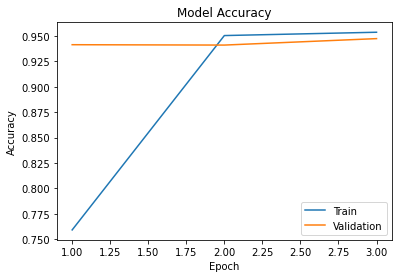

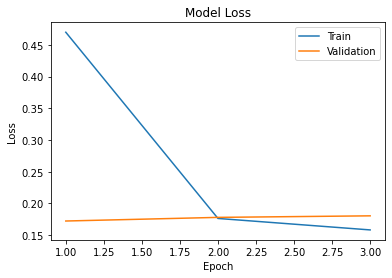

In [ ]:
plotLearningCurve(history,3)

# Test rendomly particular image

In [ ]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('C:/Users/Priya/Desktop/abc.png',\
target_size=(128,128))

test_image=image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

result = model.predict(test_image)

if result[0][0]>=0.5:
    prediction="Uninfected"
else:
    prediction="Parasitized"
print(prediction)

Uninfected


In [ ]:
trainDatagen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [ ]:
len(trainDatagen)

1378

In [ ]:
1378*16

22048

In [ ]:
len(valDatagen)

345